## 0. Code Setup and Helper Functions

### 0.1 Import all necessary packages

In [2]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
from top2vec import Top2Vec
import sys

2022-07-11 23:16:53.931722: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-11 23:16:53.931746: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### 0.2 Path Adjustments

In [3]:
assert os.path.exists('../src'), f"[ERROR] The path src not detected in the parent directory '{os.getcwd()}'."

if os.getcwd().endswith('/notebooks'):
    os.chdir('..')
    sys.path.append('./src')

print(f'[INFO] Current Directory: "{os.getcwd()}".')

[INFO] Current Directory: "/home/iceking/Desktop/22SS-TUM Lecture Docs/3. Praktikum (IN2106, IN4249)/Repo/topic-modeling-advancements".


## 1. Train

In [4]:
from src import top2vec_runner

args={
        'dataset': 'yahoo',
        'num_topics': 10,

        ####### Top2Vec Specific Arguments - START #########
        # 'embedding_model': 'doc2vec',
        'embedding_model': 'universal-sentence-encoder',
        #'embedding_model': 'universal-sentence-encoder-large', # WORKS VERY WELL
        # 'embedding_model': 'distiluse-base-multilingual-cased',
        'doc2vec_speed': 'learn',
        'min_count': 50,
        'umap_args': {
            'n_neighbors': 15,
            'n_components': 5,
            'metric': 'cosine',
            'random_state': 42  # Try to always include this for reproducibility, github.com/ddangelov/Top2Vec/issues/86
        },
        'hdbscan_args': {
            'min_cluster_size': 15,
            'metric': 'euclidean',
            'cluster_selection_method': 'eom'
        },
        # ####### Top2Vec Specific Arguments - END #########
}

model, df_output_doc_topic, df_output_topic_word = top2vec_runner.parametric_run(args)

[INFO] Top2Vec Parameters:
{
    "dataset": "yahoo",
    "num_topics": 10,
    "embedding_model": "universal-sentence-encoder",
    "doc2vec_speed": "learn",
    "min_count": 50,
    "umap_args": {
        "n_neighbors": 15,
        "n_components": 5,
        "metric": "cosine",
        "random_state": 42
    },
    "hdbscan_args": {
        "min_cluster_size": 15,
        "metric": "euclidean",
        "cluster_selection_method": "eom"
    }
}
[INFO] The embedding model folder:"./pretrained_models/universal-sentence-encoder" found, so no need to download.
[INFO] The embedding model folder:"./pretrained_models/universal-sentence-encoder-multilingual" found, so no need to download.
[INFO] The embedding model folder:"./pretrained_models/universal-sentence-encoder-large" found, so no need to download.
[INFO] The embedding model folder:"./pretrained_models/universal-sentence-encoder-multilingual-large" found, so no need to download.
[INFO] Top2Vec is running for dataset:"yahoo".


2022-07-11 23:17:00,766 - top2vec - INFO - Pre-processing documents for training
2022-07-11 23:17:07,273 - top2vec - INFO - Loading universal-sentence-encoder model at ./pretrained_models/universal-sentence-encoder
2022-07-11 23:17:07.436721: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-11 23:17:07.436749: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-11 23:17:07.436771: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (iceking-ThinkPad-T490): /proc/driver/nvidia/version does not exist
2022-07-11 23:17:07.437469: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical 

[INFO] Original (Non-reduced) Number of Topics: 319.
[INFO] Topic #00:
     > From Reduced Model:True.
     > Topic Size:8565.
     > Topic Words: ['relationships' 'relationship' 'dating' 'sex' 'boyfriend' 'lover'
		 'girlfriend' 'bf' 'love' 'marry' 'loves' 'marriage' 'ignore' 'relation'
		 'sweetie' 'honey' 'loving' 'cheating' 'trust' 'therapy' 'attraction'
		 'crush' 'married' 'sake' 'tell' 'marriages' 'depends' 'kiss' 'behave'
		 'sexually' 'divorce' 'spouse' 'jealous' 'hubby' 'treat' 'romantic' 'wait'
		 'loser' 'listen' 'girl' 'romance' 'attracted' 'emotionally' 'definately'
		 'laugh' 'caring' 'forgive' 'relations' 'couples' 'wives']
     > Topic Word Scores: [0.3225168  0.31051677 0.28802073 0.2831594  0.282128   0.27872354
		 0.27481502 0.26616195 0.26518756 0.2634853  0.26072598 0.25912988
		 0.25536674 0.25443995 0.25391722 0.25205576 0.25075418 0.24668604
		 0.2430324  0.24267894 0.24255425 0.24106464 0.2393263  0.23756951
		 0.23750444 0.23616694 0.23570585 0.23569556 0.232

## 2. Print Outputs

In [5]:
df_output_doc_topic

run_id  Document ID  \
55067  1657574220            0   
35011  1657574220            1   
38394  1657574220            2   
54461  1657574220            3   
33698  1657574220            4   
...           ...          ...   
11544  1657574220        59995   
19099  1657574220        59996   
9636   1657574220        59997   
11571  1657574220        59998   
10677  1657574220        59999   

                                                Document  \
55067  You need 2 lights to get contrast.  Set one at...   
35011    push the option arm on the mortgage calculator.   
38394  Professional clean only!  You could try spot c...   
54461  I'm a long-time Road Runner subscriber, and I ...   
33698  To score points fast enough do this:\n\n1. Ans...   
...                                                  ...   
11544                                             RVD!!!   
19099  Why not? After all, everybody is mediocre, inc...   
9636   yankees vs red sox........a more passionate ri...   
11571  What about the obvious handball?  The ref shou...   
10677  de foot mais pas pour être sélectionneur d'une...   

                 Real Label  Assigned Topic Num  Assignment Score  
55067  business_and_finance                   8          0.338366  
35011  business_and_finance                   4          0.113425  
38394  business_and_finance                   5          0.381499  
54461  business_and_finance                   8          0.386167  
33698  business_and_finance                   4          0.300729  
...                     ...                 ...               ...  
11544                sports                   1          0.344104  
19099                sports                   2          0.291012  
9636                 sports                   1          0.423567  
11571                sports                   1          0.343260  
10677                sports                   1          0.377707  

[60000 rows x 6 columns]

In [6]:
with pd.option_context('display.max_colwidth', 100):
    display(df_output_topic_word)

run_id   method  \
0  1657574220  top2vec   
1  1657574220  top2vec   
2  1657574220  top2vec   
3  1657574220  top2vec   
4  1657574220  top2vec   
5  1657574220  top2vec   
6  1657574220  top2vec   
7  1657574220  top2vec   
8  1657574220  top2vec   
9  1657574220  top2vec   

                                                                                method_specific_params  \
0  {'doc2vec_speed': 'learn', 'min_count': 50, 'embedding_model': 'universal-sentence-encoder', 'um...   
1  {'doc2vec_speed': 'learn', 'min_count': 50, 'embedding_model': 'universal-sentence-encoder', 'um...   
2  {'doc2vec_speed': 'learn', 'min_count': 50, 'embedding_model': 'universal-sentence-encoder', 'um...   
3  {'doc2vec_speed': 'learn', 'min_count': 50, 'embedding_model': 'universal-sentence-encoder', 'um...   
4  {'doc2vec_speed': 'learn', 'min_count': 50, 'embedding_model': 'universal-sentence-encoder', 'um...   
5  {'doc2vec_speed': 'learn', 'min_count': 50, 'embedding_model': 'universal-sentence-encoder', 'um...   
6  {'doc2vec_speed': 'learn', 'min_count': 50, 'embedding_model': 'universal-sentence-encoder', 'um...   
7  {'doc2vec_speed': 'learn', 'min_count': 50, 'embedding_model': 'universal-sentence-encoder', 'um...   
8  {'doc2vec_speed': 'learn', 'min_count': 50, 'embedding_model': 'universal-sentence-encoder', 'um...   
9  {'doc2vec_speed': 'learn', 'min_count': 50, 'embedding_model': 'universal-sentence-encoder', 'um...   

  dataset  num_given_topics  reduced  topic_num  topic_size  \
0   yahoo                10     True          0        8565   
1   yahoo                10     True          1        6810   
2   yahoo                10     True          2        6722   
3   yahoo                10     True          3        6648   
4   yahoo                10     True          4        6329   
5   yahoo                10     True          5        5846   
6   yahoo                10     True          6        5765   
7   yahoo                10     True          7        5234   
8   yahoo                10     True          8        4254   
9   yahoo                10     True          9        3827   

                                                                                           topic_words  \
0  [relationships, relationship, dating, sex, boyfriend, lover, girlfriend, bf, love, marry, loves,...   
1  [steelers, zidane, nfl, neven, wwe, rocky, williams, giants, chuck, kobe, espn, jones, wrestling...   
2  [lol, nope, haha, silly, yes, yep, idiot, wouldnt, omg, crap, idiots, loser, kidding, ha, depend...   
3  [republicans, democrats, politicians, republican, conservatives, iraq, democrat, christians, lib...   
4  [lawyer, attorney, lender, employer, nso, accounting, apply, lawyers, colleges, degree, employme...   
5  [exercise, symptoms, pills, symptom, surgery, doctors, shave, swelling, meds, doctor, medication...   
6  [wavelengths, gravitational, equator, physics, molecule, electrons, polar, atoms, protons, hydro...   
7  [www, websites, ebay, wikipedia, geocities, google, http, website, wiki, com, htm, yahoo, sites,...   
8  [spyware, adware, limewire, antivirus, virus, reinstall, viruses, sourceforge, norton, computer,...   
9  [um, hmm, qu, ye, uh, une, ne, not, huh, des, se, pas, dude, er, out, way, an, un, on, shut, don...   

                                                                                           word_scores  \
0  [0.3225168, 0.31051677, 0.28802073, 0.2831594, 0.282128, 0.27872354, 0.27481502, 0.26616195, 0.2...   
1  [0.34952545, 0.34069693, 0.3232832, 0.32219976, 0.318932, 0.3156339, 0.3023402, 0.2998169, 0.299...   
2  [0.467542, 0.46136358, 0.4229524, 0.42164338, 0.4192884, 0.4181155, 0.4172574, 0.41544288, 0.396...   
3  [0.2806099, 0.28036076, 0.2722821, 0.2656957, 0.26337755, 0.2581215, 0.25458828, 0.25217324, 0.2...   
4  [0.26131457, 0.25018272, 0.24496241, 0.23589621, 0.23397817, 0.23190808, 0.22617164, 0.22259426,...   
5  [0.32219285, 0.2983749, 0.28693485, 0.28280875, 0.276

In [7]:
# First Documents
for i in sorted(df_output_topic_word['topic_num'].to_list()):
    x = df_output_doc_topic.query(f'`Assigned Topic Num` == {i}').sort_values(by ='Assignment Score',ascending=False).drop('run_id',axis=1).head()
    with pd.option_context('display.max_colwidth', None):
        display(x)

Document ID  \
0        25095   
1        29164   
2        29843   
3        27283   
4        28578   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Document  \
0                                                                                                                                                                                                                                                                                                                                     Being a man, I would say just go up to him and tell him how you feel. There is nothing I hate more than a guessing game. Just put it all out there, and you will get a response, even if it isn't one you want. Holding that in just makes things worse later on for you, and him. I like it when a girl comes to me to tell me she wants me. Even if im not interested in that girl, i admire that.   
1                                                                                                                                                                                                                                                                                                                      it all depends on how well you know him. find out everything about him, but do it discretely. only then will you what to do, and it wouldn't hurt to find out from his friends if he likes you as well. cuz there is no point to baring your heart to him, if he doesn't feel the same way about you, now is there? just sit back and relax and do your homework on the guy, it will be that much better, trust me.   
2  excuse the other folks' rude answers.  it sounds like you are very worried about this.  do yourself a favor and relax.  do  you think maybe he's just telling you that to see if you'll tell him how much you care about him?  or do you  know for a fact his family may be planning to move there?  could be just a head game, i don't k now you guys' ages.  so many things we worry about never even happen, relax.  if in fact he does move, and  you find yourself with a broken heart, just try to keep really busy with your friends and family.  if you two are meant to be together it will happen t hat way.  and if not, you will fall in love with someone else and forget all about him if it'snot meant to be.  good luck   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                        People are just responding to this situation negatively because that is what they were taught growing up. Don't worry about it. Just stand by your man and be happy you found someone to love and that loves you back. Pretty soon the world will be all mixed anyway! Good Luck!   
4                                                                                                                                                                                                                                                                                                               

Document ID  \
8565        56367   
8566        58397   
8567        56300   
8568        54403   
8569        55138   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Document  \
8565                                                                                                                                                                                                                                            No one in recent NFL history has been put under as much pressure to succeed as Reggie Bush. He is not only carrying the future of an organization but also the whole hurricane devastated city of New Orleans.\n\nThe guy was such an awesome athlete each year he was at USC that I have to believe that he will rise to the challenge and quiet the critics *and I was one of his biggest hatters* like "Leborn James" did his first year in the NBA.\n\nBut! if he gets hurt his first year...he will end up like another sure-fire, can't miss running back. \n\nThe 1995 NFL #1 draft pick "Ki-Jana Carter" from Penn State.   
8566  To the person who said Derek Jeter sucks, in a post not even related to whether he was good or not.\n\nYou obviously know nothign about baseball. First off, the man was second in baseball in batting average. He is also a much better defensive SS than the writers make out to believe just because the writers hate the Yankees. He is also the captain on the most winningest team in sports history. Any team in baseball would take Derek Jeter if they had the chance, how many other players can you say that for? Not many, not even A-Rod gets that kind of recognition anymore because of his post-season performance as of late. Derek Jeter is damn good and is going to be in the Hall of Fame when he is done. \n\n'Nuff said\n\nand as for the post...I'm going to assume 11.5 or 12, thats what most middle-infielders use in HS, College, and the Pros.   
8567                                                                                                                                                                                                                                                                                           I believe there is a chance that we will eventually, however I would not say that it would make us win the world cup, cause teams create great players all the time and doens't mean they are gonna win the World Cup, look at Spain and England, and even Argentina hasn't won in awhile.  To win it takes a good mix of luck and talent.  Right now the closest thing we have to a possible Pele, or Maradona is Freddy Adu, and while I think he is a great player, I don't believe he will be as good as them, but he is developing nicely, he is only 15 or 16 I am not sure.   
8568                                                                                                                                                                                                                                                                                                                                                                                                       No man Christiano is fun to watch, eventhough he didnt perform in a some

Document ID  \
15375        23196   
15376        27087   
15377        22119   
15378        25885   
15379        59742   

                                                          Document  \
15375                                    no but it makes sense lol   
15376                                     ????? lol come on now no   
15377                     Quite possibly, but I don't give a damn.   
15378                                    no it sound really dodgey   
15379  I don't think so.................I hope not anyway, lol! :)   

                     Real Label  Assigned Topic Num  Assignment Score  
15375   entertainment_and_music                   2          0.609500  
15376  family_and_relationships                   2          0.604375  
15377   entertainment_and_music                   2          0.602341  
15378  family_and_relationships                   2          0.591285  
15379                    sports                   2          0.589488

Document ID  \
22097        40052   
22098        13291   
22099        36169   
22100        38077   
22101        41825   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Document  \
22097  Ummm... I'm going to ignore the Trolly aspects of this post and answer it as if it were a real question.\n\nA lot of Americans do, yes, but more of them don't. It's funny to me that the foreign perception of the United States is of a bunch of religious zealots just because our president happens to be one. Turn it around: Americans don't assume that all French are corrupt, all Russians are borderline fascist, all Iranians are fundamentalist nutjobs, all Bolivians are coca farmers, all Egyptians are Arab nationalists, or all Finnish people look like Conan O'Brien. Back when the Taliban was in power, we recognized that not all Afghans were radical Islamists. That's why we allied with the ones who weren't.\n\nSo why is it so hard for the rest of the world to see America as a country of individuals?\n\nI think a large percentage of Americans (probably about half) believes that God has blessed us. I am one of those peo

Document ID  \
28745        31551   
28746         4287   
28747         3713   
28748        16288   
28749         5614   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        Document  \
28745  Sorry that no one has answered your question yet...\n\nI would suggest speaking with a manager/director over your branch.  Do they know that you are having medical problems?  What are they? \n\nThere are a lot of different criteria for every company, much less the federal government.  This may be something that you may have to fight for, possibly even hire an attorney if need be.  I'm not sure as to the particulars of your situation, so I couldn't really tell you whether or not you SHOULD get disability retirement.  Definitely go through the ranks until you get an answer...that's your best bet.   
28746                      Take social work so that you have many creer feilds to choose from. But go all the way with it. 4 years masters degree. you can start off at 25-35/hr depending on your career choice. You can be a marriage councellor,drug councellor work in group homes, or be a family councellor.If you live in Canada and you are under 25 you may qualify for a program called access check with you local university to see if they offer it. You would only have to pay 27% of your income to get educated. Plus you don't have to make your first payment on your loans for up to 8 years after graduating   
28747                                                                                                                                                                     Contact your local board of relators.  They should be in the phone book or online somewhere.  They can hook you up with a relator that could talk to you about the career.  Then it is basically studying for your real estate liscence and becoming part of a real estate brokerage firm (like Remax or Century 21).  The exam is usually taken by people who have no prior experience, so don't worry about that.\n\nAchieve your dreams!!\n\nHorray   
28748                                                                                                                                                                                                                                                                                                                                                                                                                                Apply like your life depends on it.  Believe me, they will loan you the money, and especially if you go to get your doctorate or to post graduate school, then they will loan you even more   
28749                                                                                                                                                                                                                                    Talk to your banker and get a new checking account with the name or address of the property. DO NOT CO-MINGLE funds. \n\nFind a good real estate lawyer (just in case) and get information from your local and/or state government offices for specifics you need to know about. \n\nThis is way too complex for just a note---see link for some helpful information. \n\nAll the best!   

                    Real Label  Assigned Topic Num  Assignment Score  
28745                   health                   4          0.636184  
28746     business_and_finance                   4         

Document ID  \
35074        31627   
35075         1995   
35076        32707   
35077        32748   
35078        32533   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Document  \
35074                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   there is no known cure but through diet and supplements of antioxidants as well as b-12 (helps energy level) you mite have less bad days... research all that you can and then start your trial and error as to what works best for you... the fybromialgia site would be a good start... take care of yourself and rest often   
35075                                                                                                                                                                                                                                                                                                                                                                                                      Some of the medical community still don't know what triggers the onset of this disease. It happens at any age and can be found to be in family lines and not in others. A medical exam is your best bet. There are lots of meds out there to help get through it. Although some meds can cause side effects that are worse than the actual symtom. Consult a profressional. Its the best and safest method.   
35076  Yes, I'm always like that ever since I can remember and I'm pretty young too. Even if you sit at a desk all day it's enough stress to make you completely exhausted. I usually take a short nap after work, if I have enough time. One thing I noticed that helped me is drinking plenty of water, watching what I eat, and exercising. Your diet is one of the most important things though. You would be AMAZED at how different you feel just by eliminating processed and sugary fat stuff and eating more raw natural fruits and veggies. Also too much caffeine can make you burn out at the end of the day. Of course if you notice that your way too tired and this has come on suddenly you should make an appoinment to see your doctor. I don't mean to scare you but you could have other problems.   
35077                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           sometimes, doing gentle exercises can actually help with s

Document ID  \
40920        42738   
40921        44447   
40922        46501   
40923        43510   
40924        45134   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Document  \
40920                                                                                                       

Document ID  \
46685        16916   
46686         6389   
46687         6471   
46688         3130   
46689        17899   

                                                                                                                                                                        Document  \
46685                                                                                                   You might want to take a look at this site http://www.howstuffworks.com/   
46686                                                                                 its pretty easy go to this website : http://www.msgshit.com/windows_live_messenger_invites   
46687                                                                                                 Go to this website : http://www.msgshit.com/windows_live_messenger_invites   
46688                                                                                                       Try this website for starters:\n\nhttp://www.appraisalinstitute.org/   
46689  You should have mentioned which part of the world you intend to have these vegetations .... you also can look at http://www.google.com or http://www.ask.com\n\ngood luck   

                    Real Label  Assigned Topic Num  Assignment Score  
46685  education_and_reference                   7          0.737072  
46686   computers_and_internet                   7          0.735254  
46687   computers_and_internet                   7          0.733949  
46688     business_and_finance                   7          0.731712  
46689  education_and_reference                   7          0.731611

Document ID  \
51919         8646   
51920        11245   
51921         6708   
51922        10505   
51923         7912   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Document  \
51919                                                                                                                                                                                                                                                                                                                                                                                                               Try closing your browser and then re-opening it. If that doesn't work then try re-starting your computer. It's ALWAYS a good idea to re-start your computer after installing or uninstalling something on it anyway. You can also try the tips at the link that I've provided below.\n\nhttp://help.yahoo.com/l/us/yahoo/toolbar/troubleshootie/toolbar-06.html   
51920  To answer your first question about having it reformatted. I think that you should definitely reformat it. You don't know how well the other person took care of it, therefore it could be infected with spy-ware and viruses, which will affect the performance of the computer, and some of these will collect information from your computer.\n\nI am assuming that you already have an operating system (Windows 2000, XP)\n\nYou do not need a pro to do this. It is really simple. When you turn on the computer, just insert the CD into the CD-ROM and you will see on the screen a message that says...\n\nPress any key to boot from CD...\n\nAt the following link you will find the steps on how to do that\n\nhttp://www.webtree.ca/windowsxp/clean_install.htm   
51921                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          First, make sure your hardrive is not full (if it is delete some stuff). Then run an anti-virus scan and then an anti-spyware program (like adawre).   
51922                                                                                                                                                                                                                                                                                                                                                                                                                                                       Install the Windows 98 CD into your CD rom and reboot the computer, then follow the prompts. Be advised though that you'll have to go to driverguide.com to search for drivers for your hardware unless you already have them on CDs. Also, many of the newer programs will not run in Windows 98. Good luck with that.   
51923                                                                          

Document ID Document                Real Label  Assigned Topic Num  \
56682        27938           family_and_relationships                   9   
57035        54306     35.5                    sports                   9   
57211        14025            education_and_reference                   9   
56788        34245                             health                   9   
56789        34255                             health                   9   

       Assignment Score  
56682          0.913895  
57035          0.913895  
57211          0.913895  
56788          0.913895  
56789          0.913895

## 3. Visualization

### Draw Topic Similarity Matrix

In [8]:
from src import visualizer

visualizer.visualize_heatmap(
    model=model,
    df_output_doc_topic=df_output_doc_topic,
    df_output_topic_word=df_output_topic_word,
    topics= None,
    top_n_topics = None,
    n_clusters = None, # Unknown for now
    width = 1000,
    height = 1000
)

### Draw Labels per Topic

In [9]:
from src import visualizer
visualizer.visualize_labels_per_topic(df_output_doc_topic=df_output_doc_topic,
                               df_output_topic_word=df_output_topic_word,top_n_topics=10)

### Draw 2D Document Vectors 

[INFO] UMAP Arguments for Visualization:{'n_neighbors': 15, 'n_components': 2, 'metric': 'cosine', 'random_state': 42}
[INFO] UMAP Model is being fitted..
[INFO] UMAP Model successfully fitted.


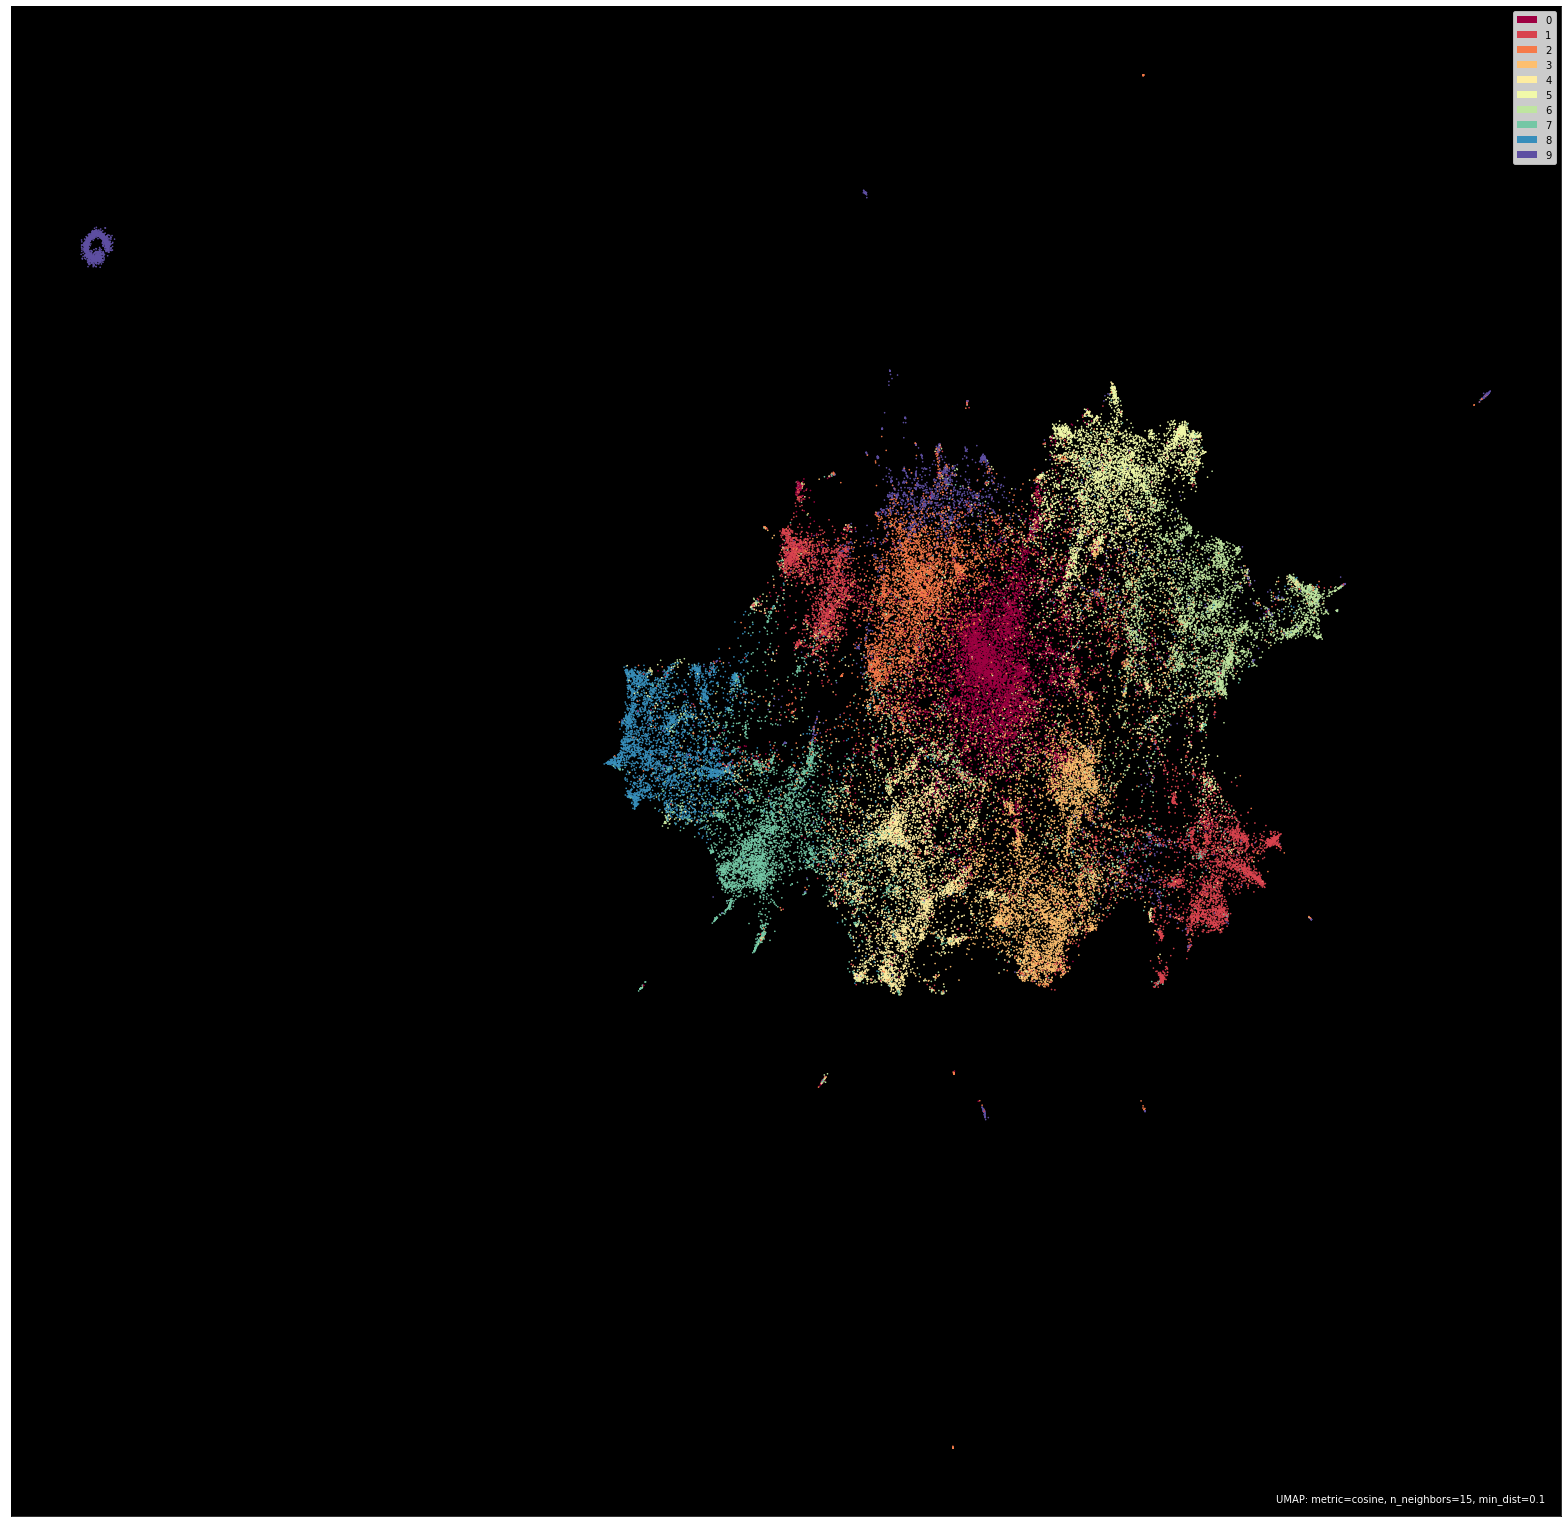

In [10]:
from src import visualizer

_ = visualizer.draw_umap2d_scatter_plot(model=model, df_output_topic_word=df_output_topic_word, target_dir= './output/visualization')

### Topic Words

In [11]:
from src import visualizer

visualizer.visualize_barchart(df_output_topic_word=df_output_topic_word,n_words=5)

## Evaluation Part (Draft)

### Topic-Label Distribution

In [11]:
for i in range(len(df_output_topic_word)):
    print(f'Topic {i}:')
    print(df_output_doc_topic.query(f'`Assigned Topic Num` == {i}') ['Real Label'].value_counts())
    print('-'*32)

Topic 0:
flood         1955
hurricane      526
forestfire     358
earthquake      60
Name: Real Label, dtype: int64
--------------------------------
Topic 1:
earthquake    1926
flood           11
forestfire       1
Name: Real Label, dtype: int64
--------------------------------
Topic 2:
forestfire    1640
flood           13
earthquake       9
hurricane        6
Name: Real Label, dtype: int64
--------------------------------
Topic 3:
hurricane     1468
flood           21
earthquake       5
forestfire       1
Name: Real Label, dtype: int64
--------------------------------


In [12]:
a = []
for i in range(len(df_output_topic_word)):
    a.append(f'Topic {i}:')
    a.append(str(df_output_doc_topic.query(f'`Assigned Topic Num` == {i}') ['Real Label'].value_counts()))
    a.append('-'*32)
a = '\n'.join(a)

In [13]:
def foo():
    for line in a.splitlines():
        if line != '-'*32:
            print(line)
        else:
            yield ''

In [14]:
x = foo()
next(x)

Topic 0:
flood         1955
hurricane      526
forestfire     358
earthquake      60
Name: Real Label, dtype: int64


''

In [15]:
next(x)

Topic 1:
earthquake    1926
flood           11
forestfire       1
Name: Real Label, dtype: int64


''

In [16]:
next(x)

Topic 2:
forestfire    1640
flood           13
earthquake       9
hurricane        6
Name: Real Label, dtype: int64


''

In [17]:
next(x)

Topic 3:
hurricane     1468
flood           21
earthquake       5
forestfire       1
Name: Real Label, dtype: int64


''

In [18]:
next(x)

StopIteration: 

In [ ]:
next(x)

In [ ]:
next(x)

In [ ]:
next(x)

In [ ]:
next(x)

In [ ]:
next(x)

In [ ]:
next(x)

In [ ]:
next(x)

In [ ]:
next(x)

In [ ]:
next(x)

In [ ]:
next(x)

In [ ]:
next(x)

In [ ]:
next(x)

In [ ]:
next(x)

In [ ]:
next(x)

In [ ]:
next(x)

### Diversity and Coherence

In [ ]:
from octis.evaluation_metrics.diversity_metrics import TopicDiversity
from octis.evaluation_metrics.coherence_metrics import Coherence

In [ ]:
from src.utils import load_documents
documents,_ = load_documents('./data/20news_bydate','text')

In [ ]:
model_output = {"topics":df_output_topic_word['topic_words'].tolist()}
metric_diversity = TopicDiversity()
metric_coherence = Coherence(texts = [d.split(" ") for d in documents], measure = "c_v")
score_diversity = metric_diversity.score(model_output)
score_coherence = metric_coherence.score(model_output)
print(f'> score_diversity={"%.4f" % score_diversity},score_coherence={"%.4f" %score_coherence}')

In [ ]:
# -----------------------

In [ ]:


model_output = {"topics":[topic_stat['topic_words'] for topic_stat in topic_stats]}


for topk_val in range(1,30):
    metric_diversity = TopicDiversity(topk=topk_val)
    metric_coherence = Coherence(texts = [d.split(" ") for d in documents], topk = topk_val, measure = "c_v")
    score_diversity = metric_diversity.score(model_output)
    score_coherence = metric_coherence.score(model_output)
    print(f'> topk={topk_val},score_diversity={"%.2f" % score_diversity},score_coherence={"%.2f" %score_coherence}')